In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [10]:
path ="Adult Dataset/adult.names"

with open(path,"r") as f:
    lines = f.readlines()

cols = []
for i in lines:
    if ":" in i:
        cols.append(i.split(":")[0].strip())

cols = cols[15:]
cols.append("Income")
cols

['age',
 'workclass',
 'fnlwgt',
 'education',
 'education-num',
 'marital-status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'capital-gain',
 'capital-loss',
 'hours-per-week',
 'native-country',
 'Income']

In [11]:
df = pd.read_csv(r"Adult Dataset\adult.data",header=None,names=cols)
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [12]:
df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  Income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [25]:
df.shape

(32561, 15)

---
## Remove data with missing values

In [14]:
# Checking for null values
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
Income            0
dtype: int64

---
## Remove outliers

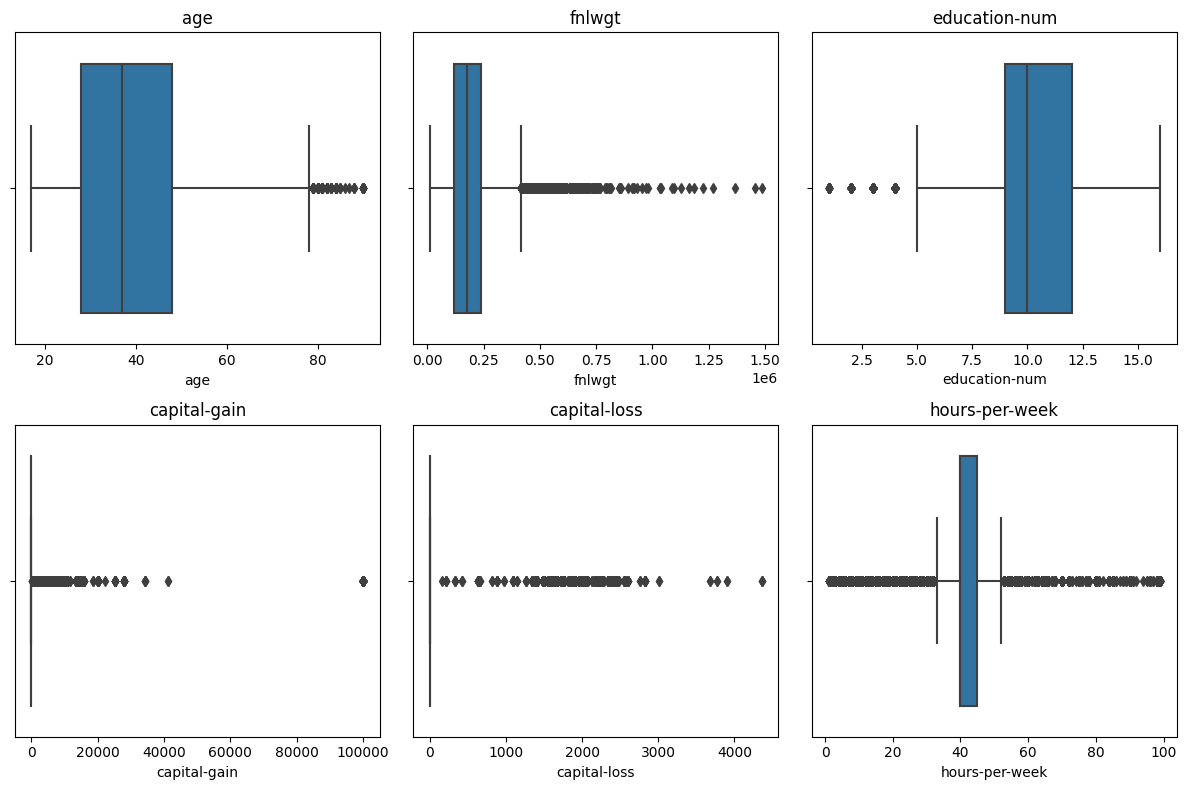

In [21]:
numerical_cols = [col for col in df.columns if df[col].dtype=='int64']

import seaborn as sns
plt.figure(figsize=(12,8))
for i,col in enumerate(numerical_cols,1):
    plt.subplot(2,3,i)
    sns.boxplot(x=df[col])
    plt.title(col)

plt.tight_layout()
plt.show()

Age: Some higher values might be outliers.

fnlwgt: Appears to have a wide distribution but no extreme outliers.

Capital-gain & Capital-loss: Clear outliers with very high values.

Hours-per-week: Some individuals seem to work extremely long hours.

In [27]:
# using Z-score
def remove_outliers(col):
    mean,  std = df[col].mean(), df[col].std()
    z_scores = df[col].apply(lambda x: (x-mean)/std)
    threshold = 3
    outlier_indices = df[(z_scores < -threshold) | (z_scores > threshold)].index

    df.drop(index=outlier_indices, inplace=True)

remove_outliers("capital-gain")
remove_outliers("capital-loss")
remove_outliers("hours-per-week")

df.shape

(29498, 15)

---
## Establish the importance of the weekly working hours on earning potential

Text(0.5, 1.0, 'ViolinPlot: Hours per Week vs Income')

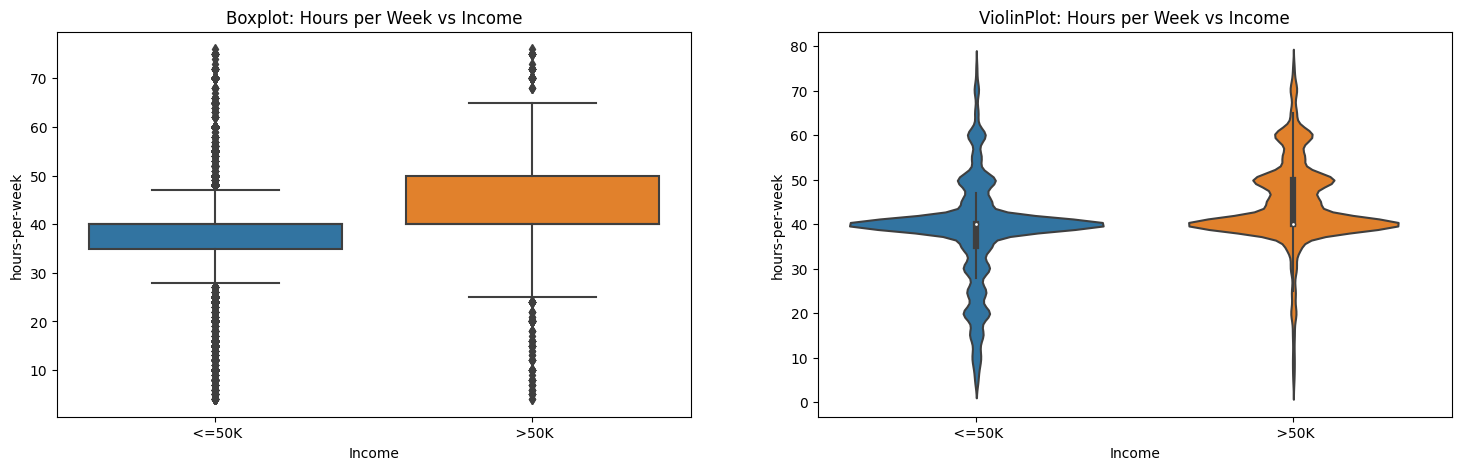

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(18, 5))
sns.boxplot(x="Income",y="hours-per-week",data=df,ax=axes[0])
axes[0].set_title("Boxplot: Hours per Week vs Income")

sns.violinplot(x="Income",y="hours-per-week",data=df,ax=axes[1])
axes[1].set_title("ViolinPlot: Hours per Week vs Income")

We can clearly conclude from this that most people who have more earning potential, do not work long hours per week.
On the contrary maximum high earners work around only 40-50 hours per week

---
## Find the features that are highly correlated with the earning potential

In [70]:
df_new = df.copy()
from sklearn.preprocessing import LabelEncoder

cat_cols = [col for col in df.columns if df[col].dtype=='object']
le = LabelEncoder()
for col in cat_cols:
    df_new[col] = le.fit_transform(df_new[col])

df_new.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Income,income_numeric
0,39,7,77516,9,13,4,1,1,4,1,2174,0,40,38,0,1
1,50,6,83311,9,13,2,4,0,4,1,0,0,13,38,0,1
2,38,4,215646,11,9,0,6,1,4,1,0,0,40,38,0,1
3,53,4,234721,1,7,2,6,0,2,1,0,0,40,38,0,1
4,28,4,338409,9,13,2,10,5,2,0,0,0,40,5,0,1


<Axes: >

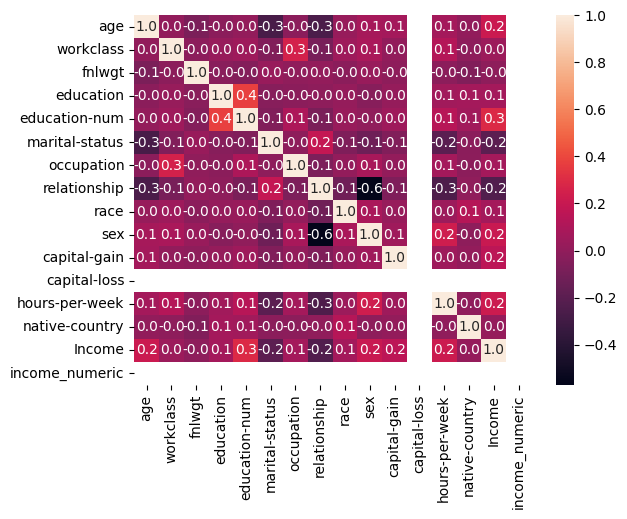

In [75]:
x = df_new.corr()
sns.heatmap(x,annot=True,fmt='.1f')

Years of Education shows the highest correlation followed by age, sex, capital-gain and hours-per-week equally.

---
## Find the relation between the number of years spent to get the degree and earning potential

<Axes: xlabel='Income', ylabel='education-num'>

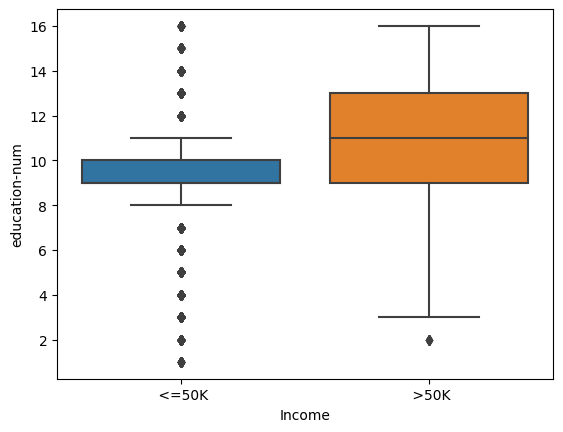

In [ ]:
sns.boxplot(x=df["Income"],y=df["education-num"])

In [100]:
grouped = df_new.groupby("education-num")["Income"].mean().reset_index()
df_new.groupby("education-num")["Income"].mean().reset_index().sort_values(by="Income")

,education-num,Income
0,1,0.000000
1,2,0.031447
6,7,0.039146
2,3,0.043750
4,5,0.047904
5,6,0.051078
3,4,0.054817
7,8,0.057971
8,9,0.137217
9,10,0.163374


C:\Users\91852\AppData\Local\Temp\ipykernel_13368\3434935140.py:9: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn-darkgrid")  # Use a clean style


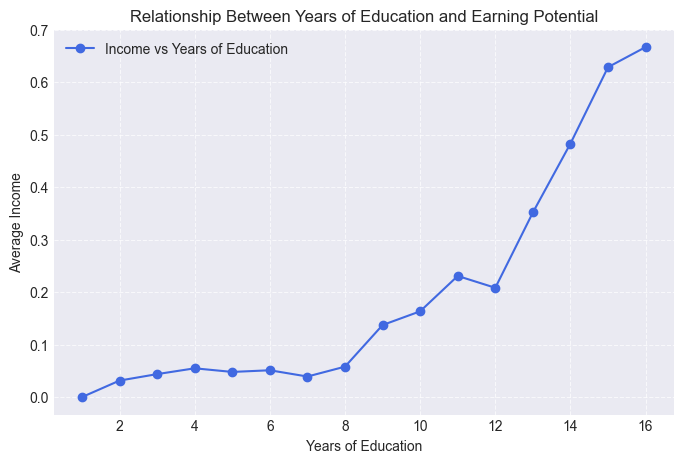

In [102]:
plt.figure(figsize=(8, 5))
plt.plot(grouped["education-num"], grouped["Income"], marker="o", linestyle="-", color="royalblue", label="Income vs Years of Education")

plt.xlabel("Years of Education")
plt.ylabel("Average Income")
plt.title("Relationship Between Years of Education and Earning Potential")
plt.grid(True, linestyle="--", alpha=0.7)  # Light dashed grid
plt.legend()
plt.style.use("seaborn-darkgrid")  # Use a clean style
plt.show()

We can see from this grouped summary statistic that Individuals with more years of education generally seems to have more earning potential

---
## Find the relationship between age and earning potential

In [97]:
grouped_statistic = df_new.groupby("age")["Income"].mean().reset_index()
grouped_statistic

,age,Income
0,17,0.000000
1,18,0.000000
2,19,0.001456
3,20,0.000000
4,21,0.002882
...,...,...
67,84,0.100000
68,85,0.000000
69,86,0.000000
70,88,0.000000


C:\Users\91852\AppData\Local\Temp\ipykernel_13368\1649008093.py:9: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn-darkgrid")  # Use a clean style


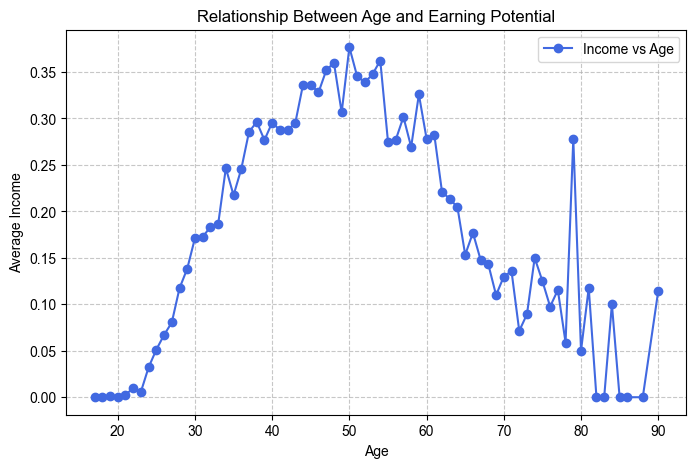

In [99]:
plt.figure(figsize=(8, 5))
plt.plot(grouped_statistic["age"], grouped_statistic["Income"], marker="o", linestyle="-", color="royalblue", label="Income vs Age")

plt.xlabel("Age")
plt.ylabel("Average Income")
plt.title("Relationship Between Age and Earning Potential")
plt.grid(True, linestyle="--", alpha=0.7)  # Light dashed grid
plt.legend()
plt.style.use("seaborn-darkgrid")  # Use a clean style
plt.show()

We see an upwards trajectory in Earning Potential as Age increases which starts to decline after the age of 50 aside from a few outliers at later ages.